<a href="https://colab.research.google.com/github/jazu1412/EDA_Data_Prep_Visual/blob/main/Tabular.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install autoviml

In [ ]:
import pandas as pd
import numpy as np

In [ ]:
data = pd.read_csv('AB_NYC_2019.csv')

In [ ]:
data.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.65,-73.97,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75,-73.98,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.81,-73.94,Private room,150,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.69,-73.96,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.80,-73.94,Entire home/apt,80,10,9,2018-11-19,0.10,1,0


In [ ]:
# Check for null values and data types
data.info()

# Summary statistics
data.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48895 entries, 0 to 48894
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              48895 non-null  int64  
 1   name                            48879 non-null  object 
 2   host_id                         48895 non-null  int64  
 3   host_name                       48874 non-null  object 
 4   neighbourhood_group             48895 non-null  object 
 5   neighbourhood                   48895 non-null  object 
 6   latitude                        48895 non-null  float64
 7   longitude                       48895 non-null  float64
 8   room_type                       48895 non-null  object 
 9   price                           48895 non-null  int64  
 10  minimum_nights                  48895 non-null  int64  
 11  number_of_reviews               48895 non-null  int64  
 12  last_review                     

,id,host_id,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
count,"48,895.00","48,895.00","48,895.00","48,895.00","48,895.00","48,895.00","48,895.00","38,843.00","48,895.00","48,895.00"
mean,"19,017,143.24","67,620,010.65",40.73,-73.95,152.72,7.03,23.27,1.37,7.14,112.78
std,"10,983,108.39","78,610,967.03",0.05,0.05,240.15,20.51,44.55,1.68,32.95,131.62
min,"2,539.00","2,438.00",40.50,-74.24,0.00,1.00,0.00,0.01,1.00,0.00
25%,"9,471,945.00","7,822,033.00",40.69,-73.98,69.00,1.00,1.00,0.19,1.00,0.00
50%,"19,677,284.00","30,793,816.00",40.72,-73.96,106.00,3.00,5.00,0.72,1.00,45.00
75%,"29,152,178.50","107,434,423.00",40.76,-73.94,175.00,5.00,24.00,2.02,2.00,227.00
max,"36,487,245.00","274,321,313.00",40.91,-73.71,"10,000.00","1,250.00",629.00,58.50,327.00,365.00


In [ ]:
# Checking columns with missing values
missing_values = data.isnull().sum()
missing_values[missing_values > 0]

# Fill missing values if necessary, for example, with the median
data['reviews_per_month'].fillna(data['reviews_per_month'].median(), inplace=True)

# Drop rows or columns if necessary
# Replace 'name', 'host_name', or 'last_review' with the actual column name you want to drop rows based on
data.dropna(subset=['name', 'host_name', 'last_review'], inplace=True)

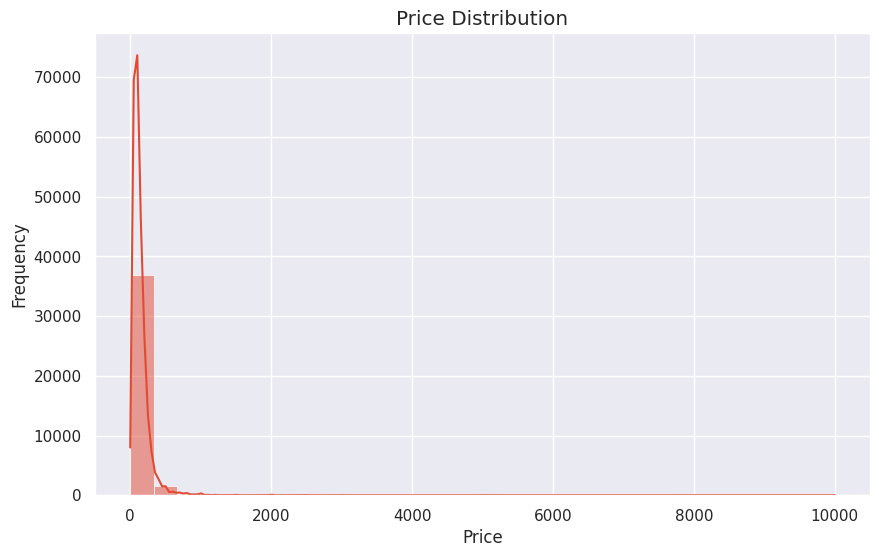

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Distribution of 'price'
plt.figure(figsize=(10, 6))
sns.histplot(data['price'], bins=30, kde=True)
plt.title('Price Distribution')
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.show()


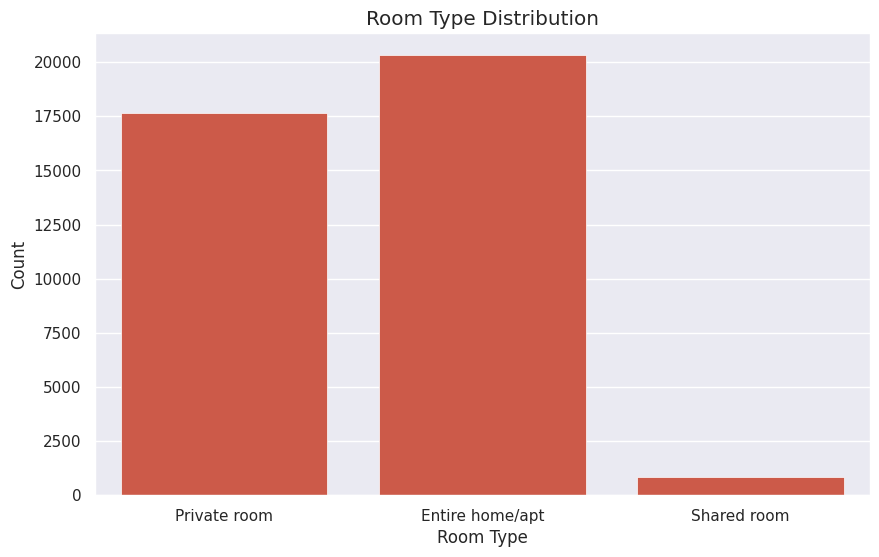

In [ ]:
# Count plot for room types
plt.figure(figsize=(10, 6))
sns.countplot(data=data, x='room_type')
plt.title('Room Type Distribution')
plt.xlabel('Room Type')
plt.ylabel('Count')
plt.show()


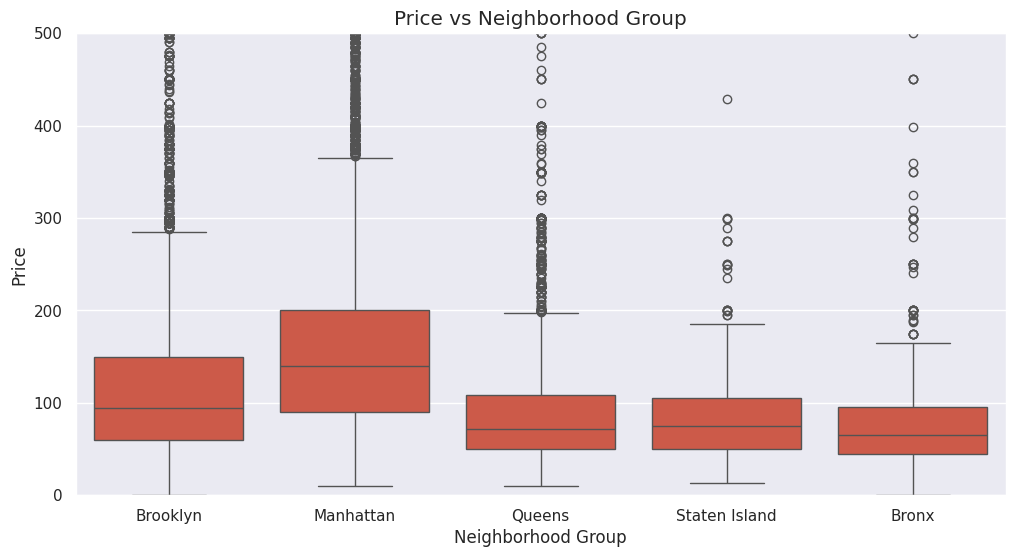

In [ ]:
# Box plot of price across neighborhoods
plt.figure(figsize=(12, 6))
sns.boxplot(x='neighbourhood_group', y='price', data=data)
plt.title('Price vs Neighborhood Group')
plt.xlabel('Neighborhood Group')
plt.ylabel('Price')
plt.ylim(0, 500)  # Limit price to avoid outliers impacting the visualization
plt.show()


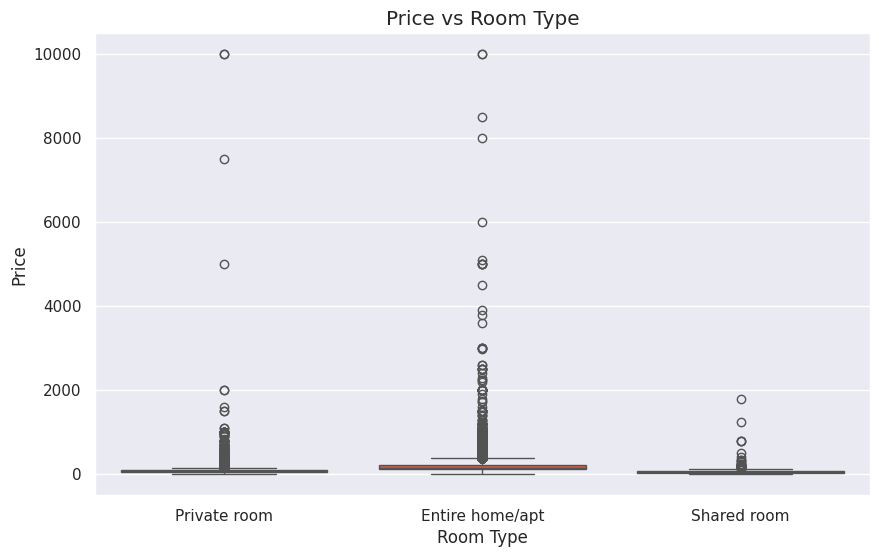

In [ ]:
# Box plot of price across room types
plt.figure(figsize=(10, 6))
sns.boxplot(x='room_type', y='price', data=data)
plt.title('Price vs Room Type')
plt.xlabel('Room Type')
plt.ylabel('Price')
plt.show()


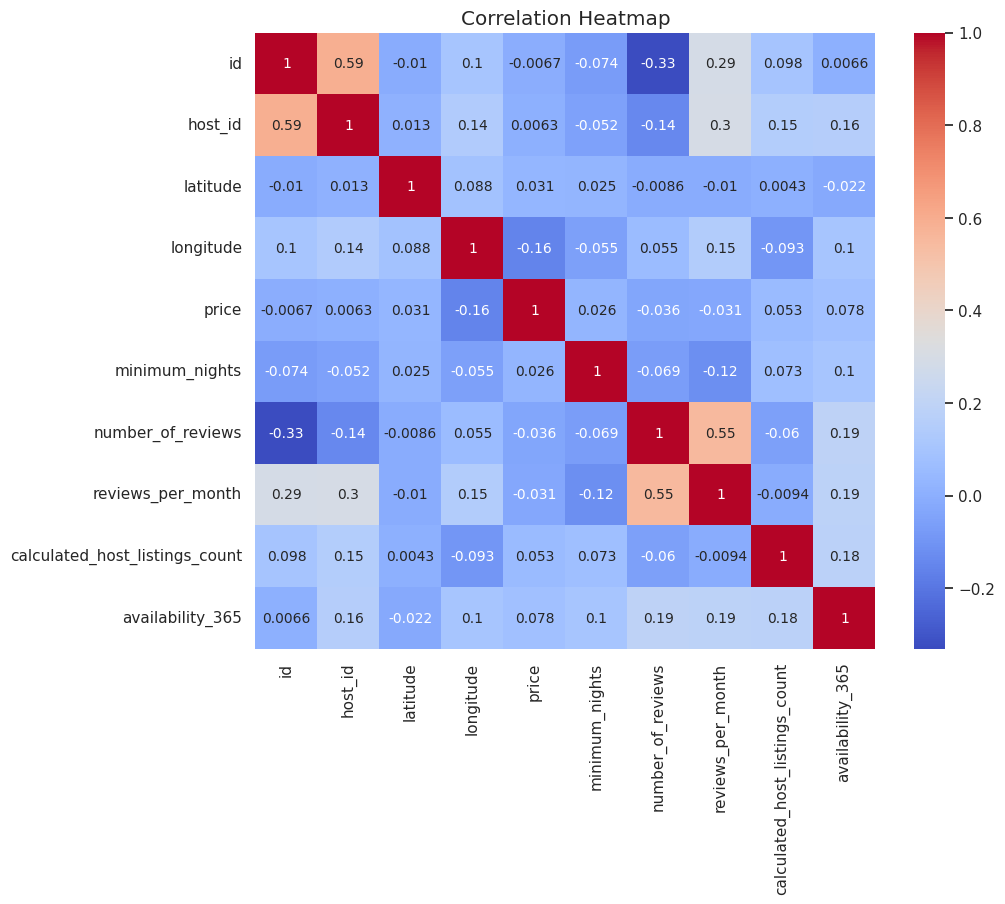

In [ ]:
# Correlation heatmap
plt.figure(figsize=(10, 8))
# Select only numerical features for correlation calculation
numerical_data = data.select_dtypes(include=['number'])
correlation_matrix = numerical_data.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()


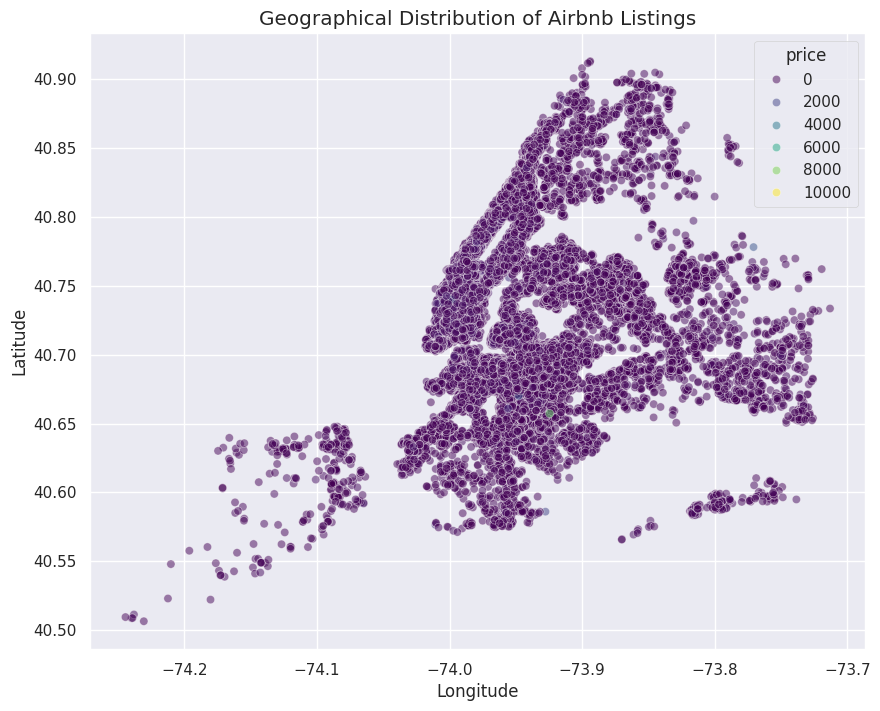

In [ ]:
# Scatter plot of listings based on location, colored by price
plt.figure(figsize=(10, 8))
sns.scatterplot(x='longitude', y='latitude', hue='price', data=data, palette='viridis', alpha=0.5)
plt.title('Geographical Distribution of Airbnb Listings')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.show()


In [ ]:
data.info()

# Basic statistics to understand the range of values
data.describe(include='all')

<class 'pandas.core.frame.DataFrame'>
Int64Index: 38821 entries, 0 to 48852
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype         
---  ------                          --------------  -----         
 0   id                              38821 non-null  int64         
 1   name                            38821 non-null  object        
 2   host_id                         38821 non-null  int64         
 3   host_name                       38821 non-null  object        
 4   neighbourhood_group             38821 non-null  object        
 5   neighbourhood                   38821 non-null  object        
 6   latitude                        38821 non-null  float64       
 7   longitude                       38821 non-null  float64       
 8   room_type                       38821 non-null  object        
 9   price                           38821 non-null  int64         
 10  minimum_nights                  38821 non-null  int64         
 11  nu

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
count,"38,821.00",38821,"38,821.00",38821,38821,38821,"38,821.00","38,821.00",38821,"38,821.00","38,821.00","38,821.00",38821,"38,821.00","38,821.00","38,821.00"
unique,NaN,38253,NaN,9885,5,218,NaN,NaN,3,NaN,NaN,NaN,1764,NaN,NaN,NaN
top,NaN,Home away from home,NaN,Michael,Manhattan,Williamsburg,NaN,NaN,Entire home/apt,NaN,NaN,NaN,2019-06-23 00:00:00,NaN,NaN,NaN
freq,NaN,12,NaN,335,16621,3163,NaN,NaN,20321,NaN,NaN,NaN,1413,NaN,NaN,NaN
first,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2011-03-28 00:00:00,NaN,NaN,NaN
last,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2019-07-08 00:00:00,NaN,NaN,NaN
mean,"18,100,808.22",NaN,"64,245,818.64",NaN,NaN,NaN,40.73,-73.95,NaN,142.33,5.87,29.29,NaN,1.37,5.17,114.89
std,"10,693,722.32",NaN,"75,897,516.44",NaN,NaN,NaN,0.05,0.05,NaN,196.99,17.39,48.18,NaN,1.68,26.30,129.53
min,"2,539.00",NaN,"2,438.00",NaN,NaN,NaN,40.51,-74.24,NaN,0.00,1.00,1.00,NaN,0.01,1.00,0.00
25%,"8,721,444.00",NaN,"7,029,525.00",NaN,NaN,NaN,40.69,-73.98,NaN,69.00,1.00,3.00,NaN,0.19,1.00,0.00



Here's a structured approach for data preprocessing and cleaning in your Google Colab notebook, applied to the Airbnb NYC 2019 dataset.

1. Load the Data and Libraries
Begin by importing the libraries and loading the dataset.

In [ ]:
# Count missing values in each column
missing_values = data.isnull().sum()
missing_values[missing_values > 0]

,0


In [ ]:
# Fill missing values in 'reviews_per_month' with the median
data['reviews_per_month'].fillna(data['reviews_per_month'].median(), inplace=True)

# Drop rows with missing values in 'name' and 'host_name' (if necessary)
data.dropna(subset=['name', 'host_name'], inplace=True)

In [ ]:
# If you have date columns, convert them
# For example, if you have 'last_review' column:
data['last_review'] = pd.to_datetime(data['last_review'], errors='coerce')

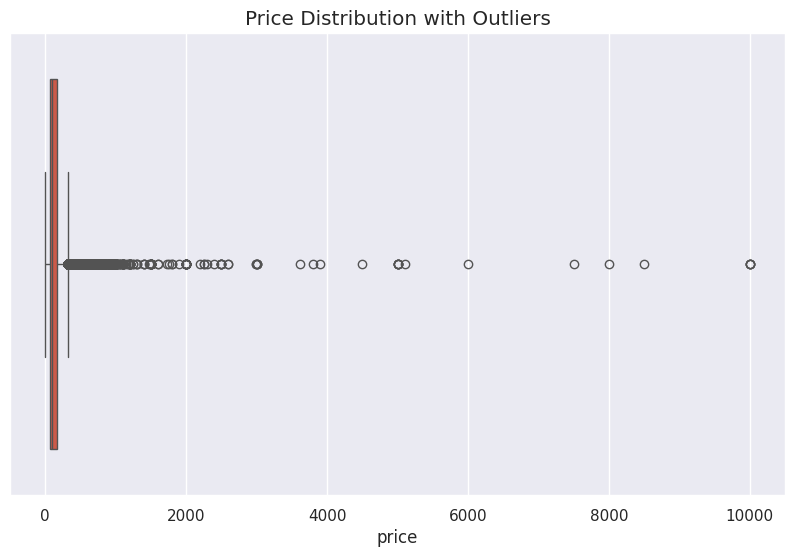

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Boxplot to visualize price distribution
plt.figure(figsize=(10, 6))
sns.boxplot(x=data['price'])
plt.title('Price Distribution with Outliers')
plt.show()


In [ ]:
# Remove listings with price above 99th percentile
price_threshold = data['price'].quantile(0.99)
data = data[data['price'] <= price_threshold]


In [ ]:
# One-hot encode 'neighbourhood_group' and 'room_type'
data = pd.get_dummies(data, columns=['neighbourhood_group', 'room_type'], drop_first=True)


In [ ]:
# Example: Extract year from 'last_review'
data['last_review_year'] = data['last_review'].dt.year

# Example: Flag listings with higher-than-average minimum nights
data['high_minimum_nights'] = data['minimum_nights'].apply(lambda x: 1 if x > data['minimum_nights'].mean() else 0)


In [ ]:
from sklearn.preprocessing import StandardScaler

# Columns to scale
cols_to_scale = ['price', 'minimum_nights', 'number_of_reviews', 'reviews_per_month', 'calculated_host_listings_count', 'availability_365']

# Initialize and apply scaler
scaler = StandardScaler()
data[cols_to_scale] = scaler.fit_transform(data[cols_to_scale])


In [ ]:
# Check the cleaned dataset
data.info()
data.head()

# Save the cleaned data to a new file
data.to_csv('/content/AB_NYC_2019_cleaned.csv', index=False)


<class 'pandas.core.frame.DataFrame'>
Int64Index: 38432 entries, 0 to 48852
Data columns (total 22 columns):
 #   Column                             Non-Null Count  Dtype         
---  ------                             --------------  -----         
 0   id                                 38432 non-null  int64         
 1   name                               38432 non-null  object        
 2   host_id                            38432 non-null  int64         
 3   host_name                          38432 non-null  object        
 4   neighbourhood                      38432 non-null  object        
 5   latitude                           38432 non-null  float64       
 6   longitude                          38432 non-null  float64       
 7   price                              38432 non-null  float64       
 8   minimum_nights                     38432 non-null  float64       
 9   number_of_reviews                  38432 non-null  float64       
 10  last_review                       

In [ ]:
# Select features for clustering (e.g., scaled numerical columns and encoded categorical features)
clustering_features = data[['price', 'minimum_nights', 'number_of_reviews',
                            'reviews_per_month', 'calculated_host_listings_count',
                            'availability_365']]

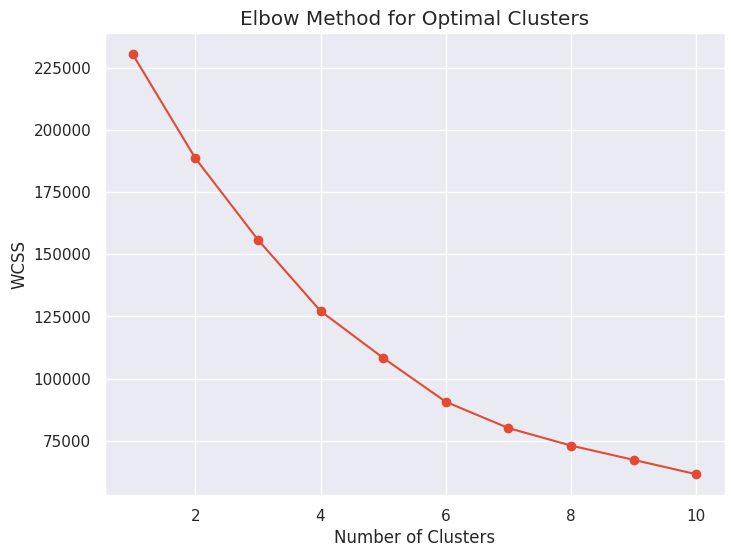

In [ ]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# Use the Elbow Method to find the optimal number of clusters
wcss = []  # Within-cluster sum of squares

for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, random_state=0)
    kmeans.fit(clustering_features)
    wcss.append(kmeans.inertia_)

# Plot the Elbow curve
plt.figure(figsize=(8, 6))
plt.plot(range(1, 11), wcss, marker='o')
plt.title('Elbow Method for Optimal Clusters')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.show()


In [ ]:
# Assuming the optimal number of clusters is found to be 4 (for example)
kmeans = KMeans(n_clusters=4, random_state=0)
data['cluster'] = kmeans.fit_predict(clustering_features)


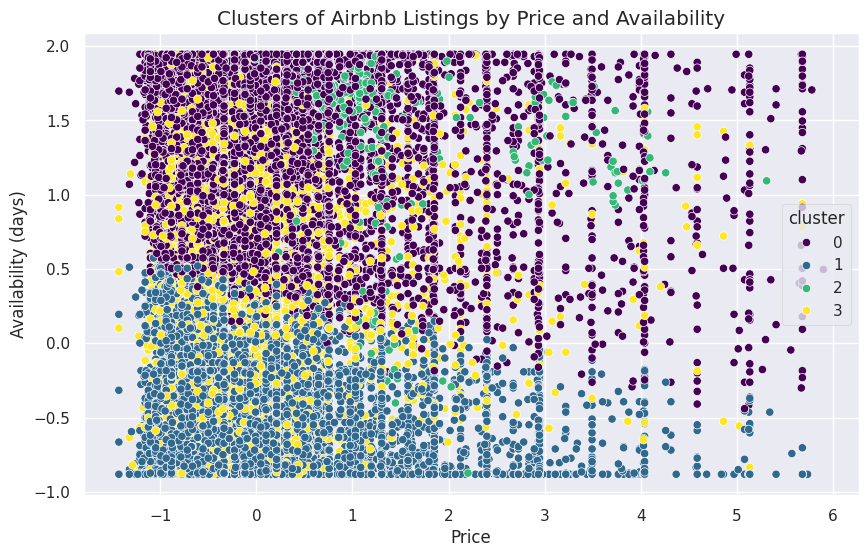

In [ ]:
import seaborn as sns

# Scatter plot of clusters by price and availability, colored by cluster label
plt.figure(figsize=(10, 6))
sns.scatterplot(x='price', y='availability_365', hue='cluster', data=data, palette='viridis')
plt.title('Clusters of Airbnb Listings by Price and Availability')
plt.xlabel('Price')
plt.ylabel('Availability (days)')
plt.show()


In [ ]:
from sklearn.ensemble import IsolationForest

# Initialize the Isolation Forest model
iso_forest = IsolationForest(contamination=0.02, random_state=0)  # 2% contamination, adjust as needed
data['anomaly'] = iso_forest.fit_predict(clustering_features)

# Convert anomalies to boolean (1 = outlier, -1 = normal)
data['anomaly'] = data['anomaly'].apply(lambda x: 1 if x == -1 else 0)


In [ ]:
# Display the rows marked as anomalies
anomalies = data[data['anomaly'] == 1]
anomalies.head()


,id,name,host_id,host_name,neighbourhood,latitude,longitude,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,neighbourhood_group_Brooklyn,neighbourhood_group_Manhattan,neighbourhood_group_Queens,neighbourhood_group_Staten Island,room_type_Private room,room_type_Shared room,last_review_year,high_minimum_nights,cluster,anomaly
61,15396,Sunny & Spacious Chelsea Apartment,60278,Petra,Chelsea,40.75,-74.00,2.67,10.04,-0.51,2018-11-03,-0.75,-0.16,0.51,0,1,0,0,0,0,2018,1,0,1
106,25235,Large 2 Bedroom Great for Groups!,87773,Shelly,Bedford-Stuyvesant,40.68,-73.92,-0.06,4.85,2.74,2019-06-28,0.05,-0.12,0.18,1,0,0,0,0,0,2019,1,3,1
113,26785,Park Slope Green Guest House,42273,Dani,South Slope,40.67,-73.99,-0.12,1.39,9.05,2018-12-30,1.69,-0.12,0.61,1,0,0,0,0,0,2018,1,3,1
116,26969,2 story family home in Williamsburg,115307,Alexandra,Williamsburg,40.72,-73.96,2.13,-0.16,6.09,2019-06-23,0.97,-0.16,-0.05,1,0,0,0,0,0,2019,0,3,1
202,54158,The Institute—Heart of Williamsburg,10889,Bob,Williamsburg,40.72,-73.96,1.29,-0.22,6.80,2019-06-20,1.22,-0.12,0.39,1,0,0,0,0,0,2019,0,3,1


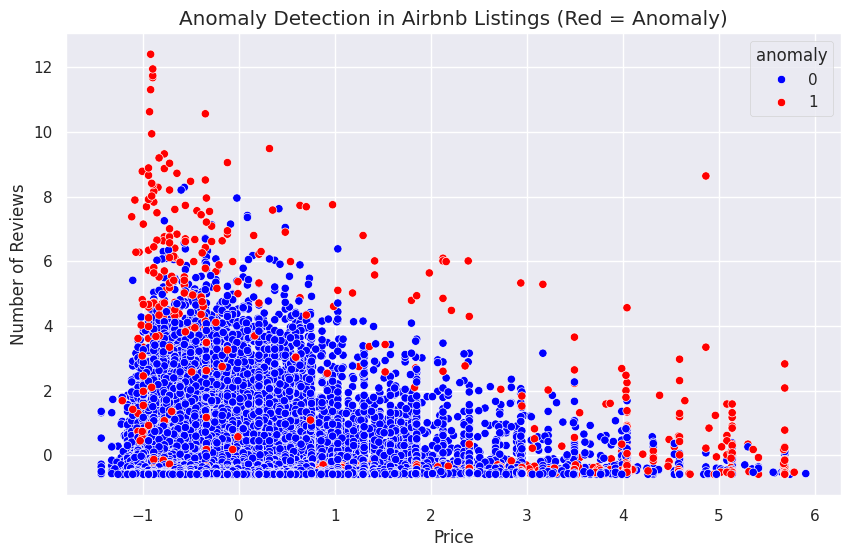

In [ ]:
# Scatter plot of price vs. number of reviews, marking anomalies
plt.figure(figsize=(10, 6))
sns.scatterplot(x='price', y='number_of_reviews', hue='anomaly', data=data, palette={0: 'blue', 1: 'red'})
plt.title('Anomaly Detection in Airbnb Listings (Red = Anomaly)')
plt.xlabel('Price')
plt.ylabel('Number of Reviews')
plt.show()


In [ ]:
# Remove anomalies from the dataset
cleaned_data = data[data['anomaly'] == 0]
cleaned_data.drop(columns=['anomaly', 'cluster'], inplace=True)  # Drop anomaly and cluster columns if not needed


In [ ]:
# Define the target variable and feature set
target = 'price'
X = data.drop(columns=[target])
y = data[target]



In [ ]:
from sklearn.model_selection import train_test_split

# Splitting the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [ ]:
!pip install --upgrade scipy==1.11.4

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 60.4/60.4 kB 3.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 36.4/36.4 MB 23.6 MB/s eta 0:00:00
  Attempting uninstall: scipy
    Found existing installation: scipy 1.13.1
    Uninstalling scipy-1.13.1:
      Successfully uninstalled scipy-1.13.1
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
mizani 0.13.0 requires pandas>=2.2.0, but you have pandas 1.5.3 which is incompatible.
plotnine 0.14.0 requires pandas>=2.2.0, but you have pandas 1.5.3 which is incompatible.


In [ ]:
!pip uninstall -y scipy
!pip install scipy==1.7.3

Found existing installation: scipy 1.11.4
Uninstalling scipy-1.11.4:
  Successfully uninstalled scipy-1.11.4
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 39.9/39.9 MB 24.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 16.8/16.8 MB 75.6 MB/s eta 0:00:00
  Attempting uninstall: numpy
    Found existing installation: numpy 1.26.4
    Uninstalling numpy-1.26.4:
      Successfully uninstalled numpy-1.26.4
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
albucore 0.0.19 requires numpy>=1.24.4, but you have numpy 1.22.4 which is incompatible.
albumentations 1.4.20 requires numpy>=1.24.4, but you have numpy 1.22.4 which is incompatible.
albumentations 1.4.20 requires scipy>=1.10.0, but you have scipy 1.7.3 which is incompatible.
arviz 0.20.0 requires numpy>=1.23.0, but you have numpy 1.22.4 which is incompatible.
arviz 0.20.0 requires scipy>=1.9.0, but you

##############  D A T A   S E T  A N A L Y S I S  #######################
ALERT! Changing hyperparameter search to RS. Otherwise XGBoost will take too long for 10,000+ rows.
Training Set Shape = (30745, 22)
    Training Set Memory Usage = 5.40 MB
Test Set Shape = (7687, 21)
    Test Set Memory Usage = 1.29 MB
Single_Label Target: ['price']

################ Regression VISUALIZATION Started #####################
No shuffling of data set before training...
    Using RandomizedSearchCV for Hyper Parameter Tuning. This is 3X faster than GridSearchCV...
#######################################################################################
######################## C L A S S I F Y I N G  V A R I A B L E S  ####################
#######################################################################################
Classifying variables in data set...
    Number of Numeric Columns =  7
    Number of Integer-Categorical Columns =  1
    Number of String-Categorical Columns =  0
    Number of Fa

[nltk_data] Downloading collection 'popular'
[nltk_data]    | 
[nltk_data]    | Downloading package cmudict to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/cmudict.zip.
[nltk_data]    | Downloading package gazetteers to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/gazetteers.zip.
[nltk_data]    | Downloading package genesis to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/genesis.zip.
[nltk_data]    | Downloading package gutenberg to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/gutenberg.zip.
[nltk_data]    | Downloading package inaugural to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/inaugural.zip.
[nltk_data]    | Downloading package movie_reviews to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Unzipping corpora/movie_reviews.zip.
[nltk_data]    | Downloading package names to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/names.zip.
[nltk_data]    | Downloading package shakespeare to /root/nltk_data...
[nlt

Auto NLP processing on NLP Column: name
Shape of Train Data: 30745 rows
    Shape of Test Data: 7687 rows
    Added 9 summary columns for counts of words and characters in each row
Cleaning text in Train data for name column
    Faster text processing using clean_text function, since top_num_features is below 300
    Time Taken for Expanding emojis and abbreviations in data = 1 seconds
        Time Taken for Processing text in data = 40 seconds
Train data Text cleaning completed. Time taken = 42 seconds
##################    THIS IS FOR BUILD_MODEL = FALSE           #################
Building Model and Pipeline for NLP column = name. This will take time...
    Selected the maximum number of features limit = 5000
Performing RandomizedSearchCV across 30 params. Optimizing for neg_mean_squared_error
    Using train data = (24596,) and Cross Validation data = (6149,)
Since top_num_features = 200, LightGBM Regressor model selected. If you need different model, increase it >= 300.
[LightGBM]

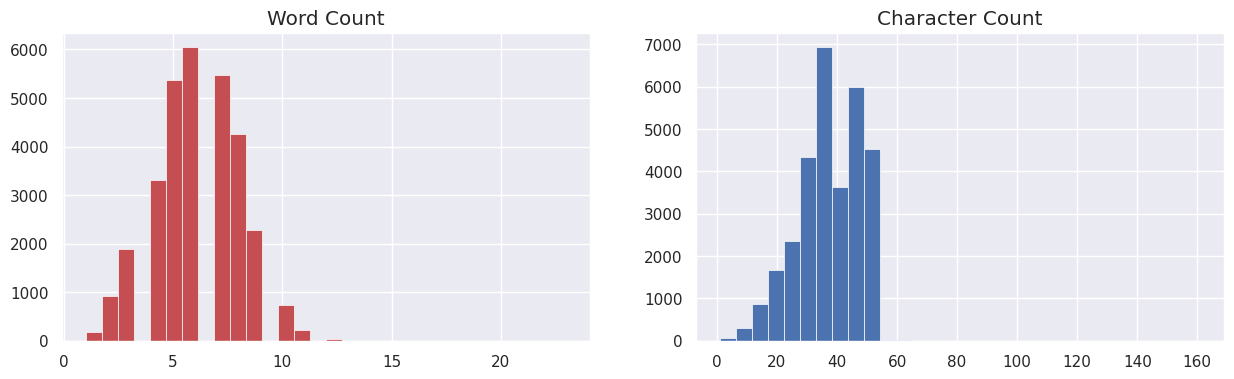

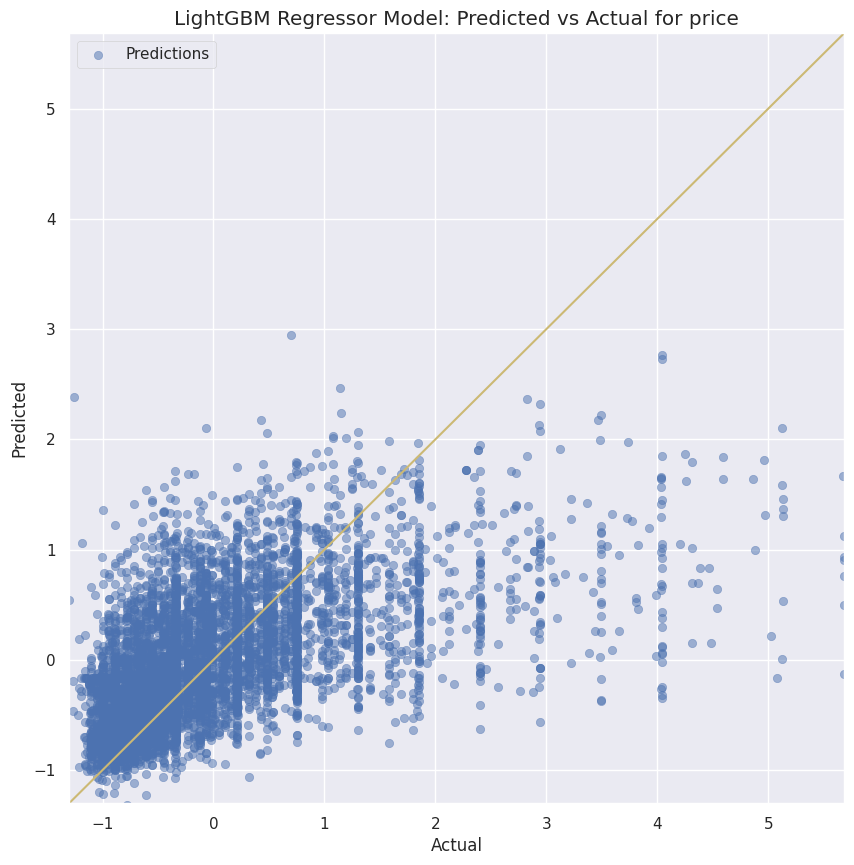

    MAE = 0.5529
    MAPE = 218%
    RMSE = 0.8152
    MAE as % std dev of Actuals = 81.4%
    Normalized RMSE (% of MinMax of Actuals) = 12%
    Normalized RMSE (% of Std Dev of Actuals) = 82%
  Now transforming Train data to return as output...
    Time Taken for Expanding emojis and abbreviations in data = 2 seconds
        Time Taken for Processing text in data = 35 seconds
  Transforming Test data to return as output...
    Time Taken for Expanding emojis and abbreviations in data = 0 seconds
        Time Taken for Processing text in data = 10 seconds
###    AFTER BEST NLP TRANSFORMER SELECTED, NOW ENRICH TEXT DATA  ##############
    Now transforming NLP_column for train and test data using best vectorizer...
Reducing dimensions from 4937 term-matrix to 70 dimensions using TruncatedSVD...
    Reduced dimensional array shape to (30745, 70)
    Time Taken for Truncated SVD = 2 seconds
TruncatedSVD Data Frame size = (30745, 70)
Reducing dimensions from 4937 term-matrix to 70 dimensi

[nltk_data] Downloading collection 'popular'
[nltk_data]    | 
[nltk_data]    | Downloading package cmudict to /root/nltk_data...
[nltk_data]    |   Package cmudict is already up-to-date!
[nltk_data]    | Downloading package gazetteers to /root/nltk_data...
[nltk_data]    |   Package gazetteers is already up-to-date!
[nltk_data]    | Downloading package genesis to /root/nltk_data...
[nltk_data]    |   Package genesis is already up-to-date!
[nltk_data]    | Downloading package gutenberg to /root/nltk_data...
[nltk_data]    |   Package gutenberg is already up-to-date!
[nltk_data]    | Downloading package inaugural to /root/nltk_data...
[nltk_data]    |   Package inaugural is already up-to-date!
[nltk_data]    | Downloading package movie_reviews to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Package movie_reviews is already up-to-date!
[nltk_data]    | Downloading package names to /root/nltk_data...
[nltk_data]    |   Package names is already up-to-date!
[nltk_data]    | Do

Auto NLP processing on NLP Column: host_name
Shape of Train Data: 30745 rows
    Shape of Test Data: 7687 rows
    Added 9 summary columns for counts of words and characters in each row
Cleaning text in Train data for host_name column
    Faster text processing using clean_text function, since top_num_features is below 300
    Time Taken for Expanding emojis and abbreviations in data = 0 seconds
        Time Taken for Processing text in data = 22 seconds
Train data Text cleaning completed. Time taken = 23 seconds
##################    THIS IS FOR BUILD_MODEL = FALSE           #################
Building Model and Pipeline for NLP column = host_name. This will take time...
    Selected the maximum number of features limit = 3106
Performing RandomizedSearchCV across 30 params. Optimizing for neg_mean_squared_error
    Using train data = (24596,) and Cross Validation data = (6149,)
Since top_num_features = 200, LightGBM Regressor model selected. If you need different model, increase it >= 

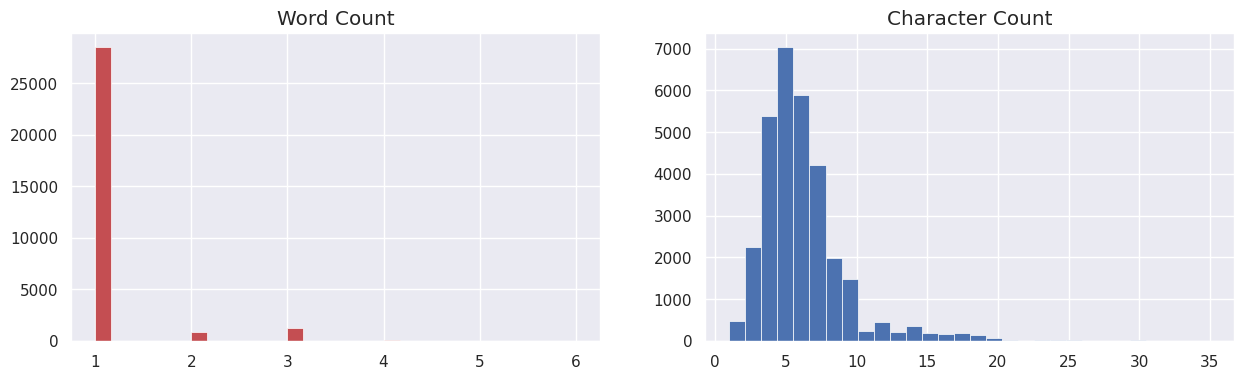

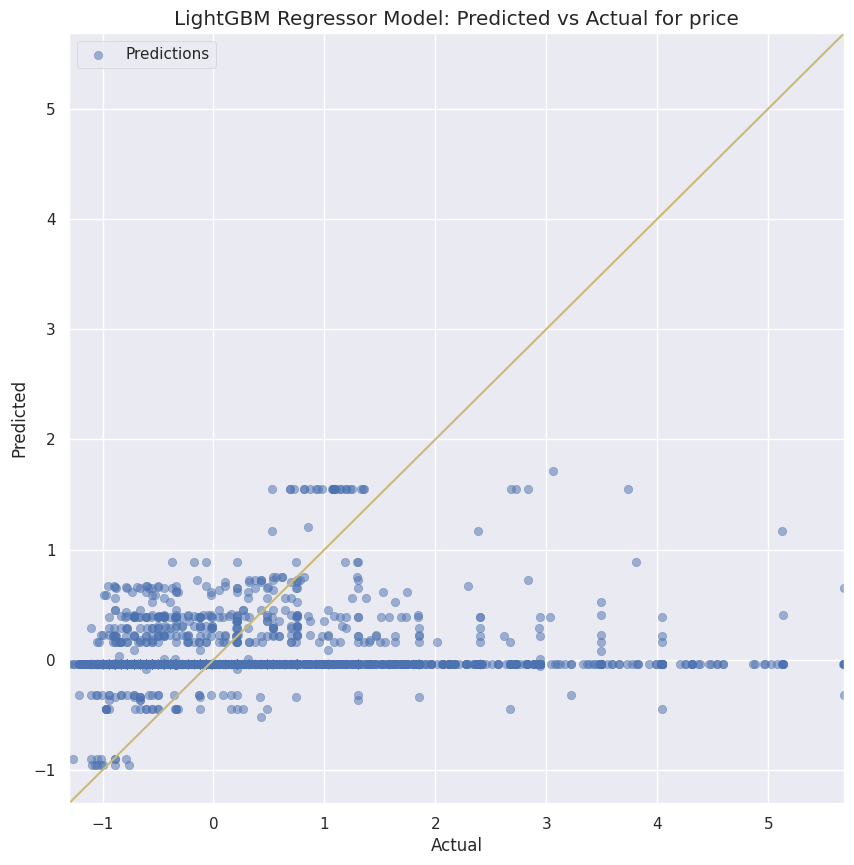

    MAE = 0.7077
    MAPE = 109%
    RMSE = 0.9814
    MAE as % std dev of Actuals = 104.2%
    Normalized RMSE (% of MinMax of Actuals) = 14%
    Normalized RMSE (% of Std Dev of Actuals) = 99%
  Now transforming Train data to return as output...
    Time Taken for Expanding emojis and abbreviations in data = 0 seconds
        Time Taken for Processing text in data = 22 seconds
  Transforming Test data to return as output...
    Time Taken for Expanding emojis and abbreviations in data = 0 seconds
        Time Taken for Processing text in data = 5 seconds
###    AFTER BEST NLP TRANSFORMER SELECTED, NOW ENRICH TEXT DATA  ##############
    Now transforming NLP_column for train and test data using best vectorizer...
Reducing dimensions from 255 term-matrix to 15 dimensions using TruncatedSVD...
    Reduced dimensional array shape to (30745, 15)
    Time Taken for Truncated SVD = 0 seconds
TruncatedSVD Data Frame size = (30745, 15)
Reducing dimensions from 255 term-matrix to 15 dimension

[nltk_data] Downloading collection 'popular'
[nltk_data]    | 
[nltk_data]    | Downloading package cmudict to /root/nltk_data...
[nltk_data]    |   Package cmudict is already up-to-date!
[nltk_data]    | Downloading package gazetteers to /root/nltk_data...
[nltk_data]    |   Package gazetteers is already up-to-date!
[nltk_data]    | Downloading package genesis to /root/nltk_data...
[nltk_data]    |   Package genesis is already up-to-date!
[nltk_data]    | Downloading package gutenberg to /root/nltk_data...
[nltk_data]    |   Package gutenberg is already up-to-date!
[nltk_data]    | Downloading package inaugural to /root/nltk_data...
[nltk_data]    |   Package inaugural is already up-to-date!
[nltk_data]    | Downloading package movie_reviews to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Package movie_reviews is already up-to-date!
[nltk_data]    | Downloading package names to /root/nltk_data...
[nltk_data]    |   Package names is already up-to-date!
[nltk_data]    | Do

    Added 9 summary columns for counts of words and characters in each row
Cleaning text in Train data for last_review column
    Faster text processing using clean_text function, since top_num_features is below 300
    Time Taken for Expanding emojis and abbreviations in data = 0 seconds
        Time Taken for Processing text in data = 23 seconds
Train data Text cleaning completed. Time taken = 24 seconds
##################    THIS IS FOR BUILD_MODEL = FALSE           #################
Building Model and Pipeline for NLP column = last_review. This will take time...
Auto_NLP error. Continuing without NLP processing
Processing last_review_year column for date time features....
    Adding 1 columns from date-time column last_review_year in train
        Adding time series features for test data...
#######################################################################################
#####  SULOV:  Searching for Uncorrelated List Of Variables in 7 features ############
##################

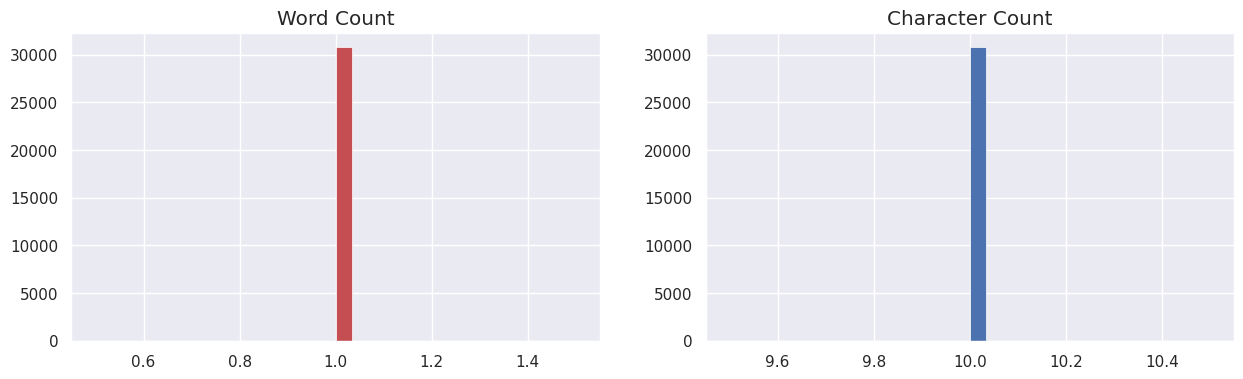

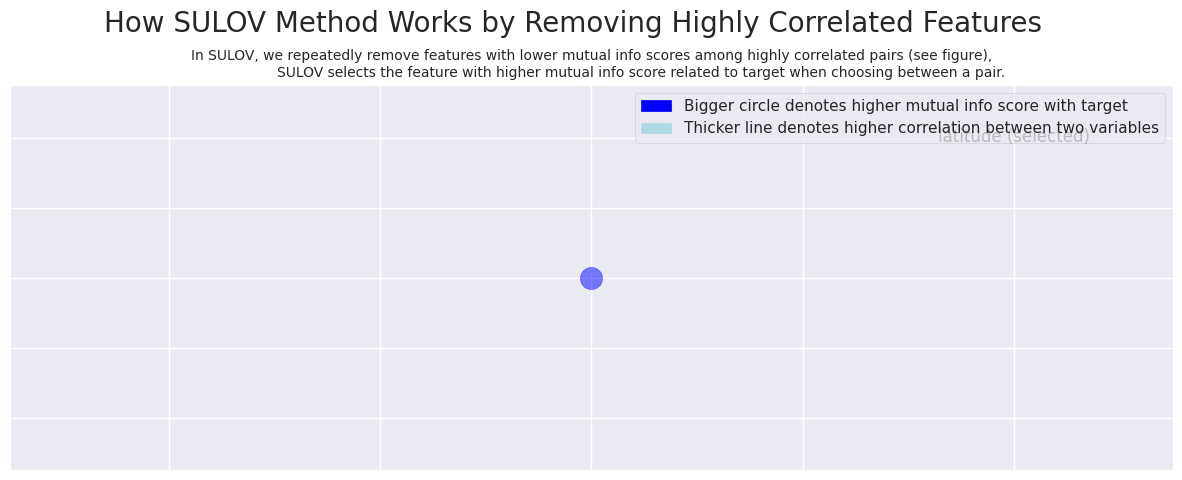

Splitting selected features into float and categorical (integer) variables:
    (7) float variables ...
    (11) categorical vars...
###############################################################################
#######     F E A T U R E   S E L E C T I O N    BY   X G B O O S T    ########
###############################################################################
Current number of predictors = 18 
    Finding Important Features using Boosted Trees algorithm...
        using 18 variables...
        using 14 variables...
        using 10 variables...
        using 6 variables...
        using 2 variables...
Found 16 important features
    Performing limited feature engineering for binning, add_poly and KMeans_Featurizer flags  ...
    Train CV Split completed with TRAIN rows =  24596 , CV rows =  6149
    Binning_Flag set to False or there are no float vars in data set to be binned
    KMeans_Featurizer set to False or there are no float variables in data
Performing MinMax scaling

RuntimeError: module was compiled against NumPy C-API version 0x10 (NumPy 1.23) but the running NumPy has C-API version 0xf. Check the section C-API incompatibility at the Troubleshooting ImportError section at https://numpy.org/devdocs/user/troubleshooting-importerror.html#c-api-incompatibility for indications on how to solve this problem.
RuntimeError: module was compiled against NumPy C-API version 0x10 (NumPy 1.23) but the running NumPy has C-API version 0xf. Check the section C-API incompatibility at the Troubleshooting ImportError section at https://numpy.org/devdocs/user/troubleshooting-importerror.html#c-api-incompatibility for indications on how to solve this problem.
RuntimeError: module was compiled against NumPy C-API version 0x10 (NumPy 1.23) but the running NumPy has C-API version 0xf. Check the section C-API incompatibility at the Troubleshooting ImportError section at https://numpy.org/devdocs/user/troubleshooting-importerror.html#c-api-incompatibility for indications o

    Actual training time (in seconds): 1841
###########  Single_Label  M O D E L   R E S U L T S #################
5-fold Cross Validation rmse Score = 0.7022
    Best Parameters for Model = {'gamma': 8, 'learning_rate': 0.031446387626298145, 'max_depth': 7, 'n_estimators': 229}
########################################################
XGBoost Model Prediction Results on Held Out CV Data Set:
Regression Plots completed in 0.045 seconds
    MAE = 0.4379
    MAPE = 203% (MAPE will be very high when zeros in actuals)
    RMSE = 0.6963
    Normalized MAE (as % std dev of Actuals) = 65%
    Normalized RMSE (% of Std Dev of Actuals) = 70%
################# E N S E M B L E  M O D E L  ##################
Time taken = 32 seconds
Based on trying multiple models, Best type of algorithm for this data set is RF_Regressor
    Displaying results of weighted average ensemble of 5 regressors
#############################################################################
Regression Plots completed in 0.054

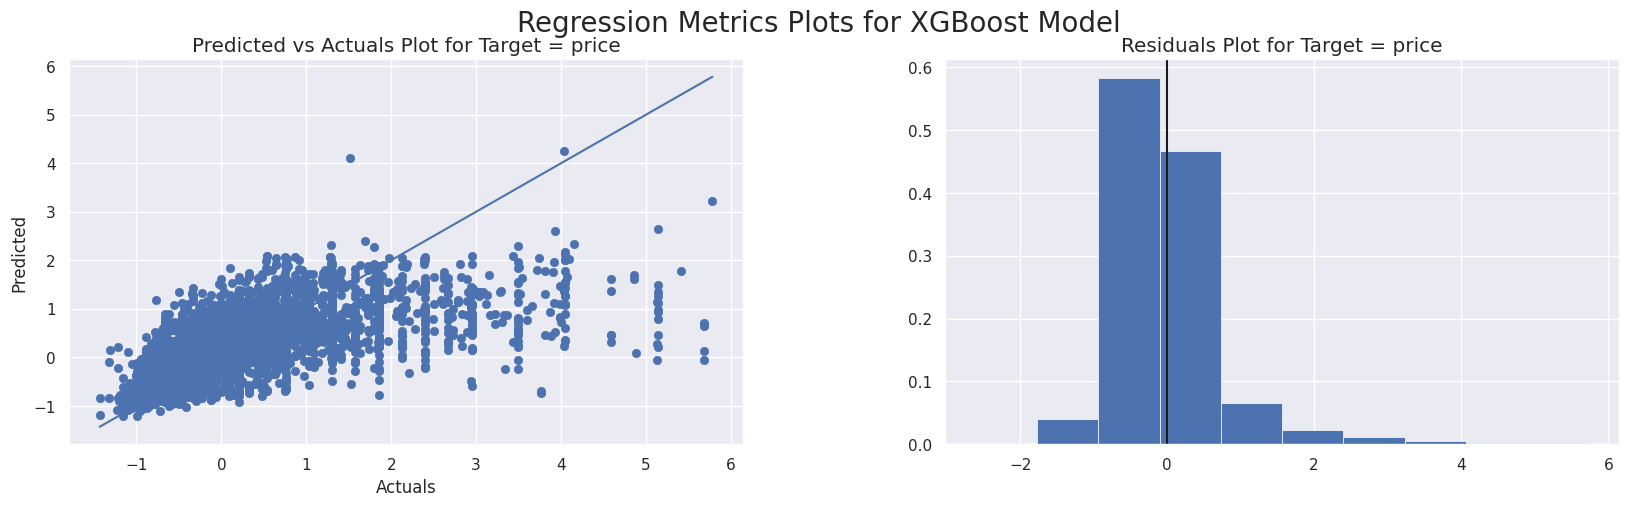

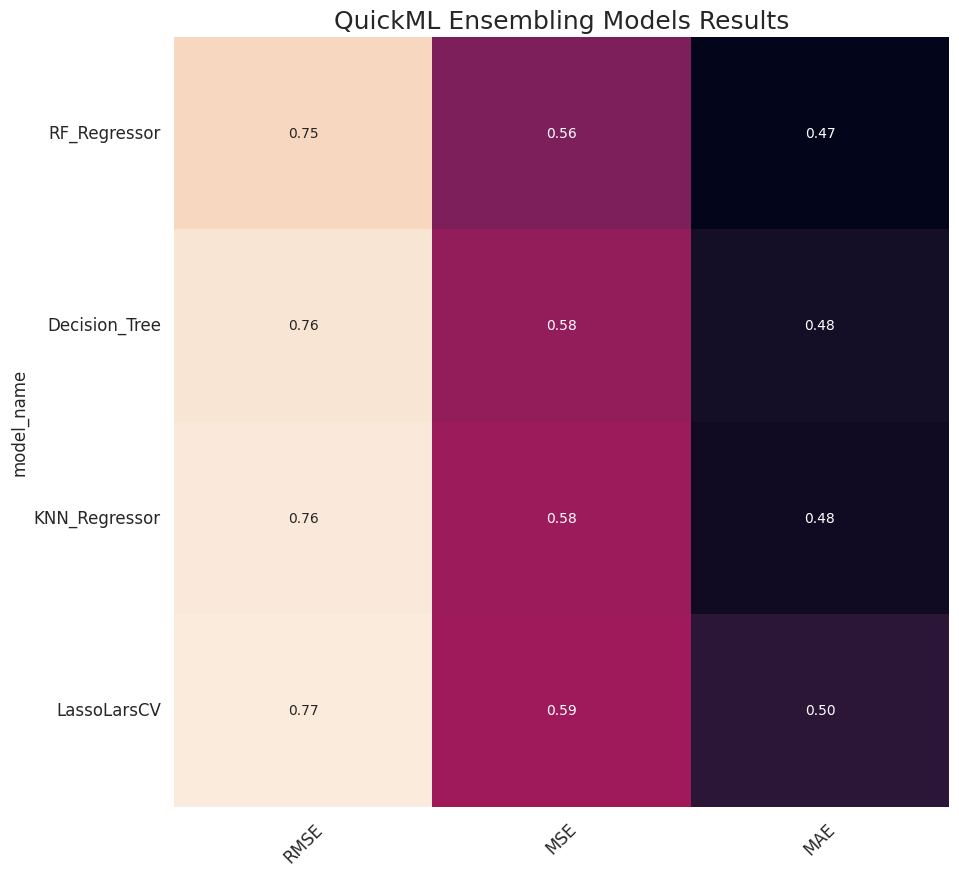

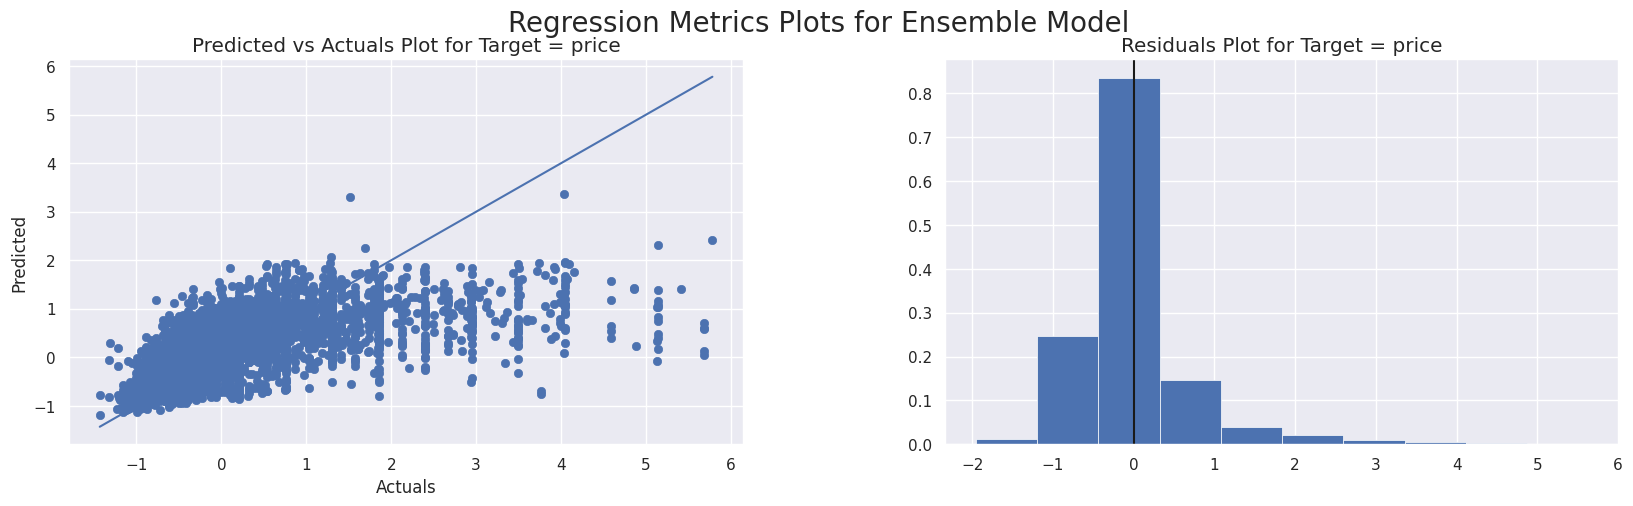

In [ ]:
# Import necessary libraries
import pandas as pd
from sklearn.model_selection import train_test_split
from autoviml.Auto_ViML import Auto_ViML

# Load your cleaned dataset
data = pd.read_csv('/content/AB_NYC_2019_cleaned.csv')

# Define the target variable and feature set
target = 'price'
X = data.drop(columns=[target])
y = data[target]

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Combine X_train and y_train for AutoViML
train = pd.concat([X_train, y_train], axis=1)

# Run AutoViML for Automated Machine Learning
model, features, trainm, testm = Auto_ViML(
    train=train,           # Combined DataFrame with features and target
    target=target,         # Target variable as a string
    test=X_test,           # Test set features only
    scoring_parameter='r2',  # Adjust scoring metric based on your objective (e.g., 'r2' for regression)
    hyper_param='RS',       # Use random search for faster tuning
    feature_reduction=True, # Enable feature reduction
    Boosting_Flag=True,     # Enables ensemble model building
    verbose=1
)

# Check if the model is successfully created
if model is not None:
    # Make predictions on the test set
    predictions = model.predict(X_test)
    print(predictions)
else:
    print("Model training failed. Check your data and parameters.")
